In [53]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

In [54]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [55]:
#виведемо данні df_train
print('Rows and column: ', df_train.shape)
df_train.head(10)

Rows and column:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [56]:
#виведемо данні df_test
print('Rows and column:', df_test.shape)
df_test.head(10)

Rows and column: (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [57]:
#тип данних
df_train.dtypes.value_counts()

object     5
int64      5
float64    2
dtype: int64

In [58]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [59]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [60]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [61]:
#заповнення модою missing value
def fill_with_mode(df):
    i = 0
    df_train_features_list = list(df)
    for number in df.isnull().sum():
        if number > 0:
            df[df_train_features_list[i]] = df[df_train_features_list[i]].fillna(df[df_train_features_list[i]].value_counts().index[0])
        i = i + 1

In [62]:
#заповнення модою 
fill_with_mode(df_train)
print('Rows and column: ', df_train.shape)
print()
print(df_train.isnull().sum())

Rows and column:  (891, 12)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [63]:
#заповнення модою 
fill_with_mode(df_test)
print('Rows and column: ', df_test.shape)
print()
print(df_test.isnull().sum())

Rows and column:  (418, 11)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [64]:
df_train.drop('PassengerId', axis='columns', inplace=True)
df_train.drop('Name', axis='columns', inplace=True)
df_train.drop('Ticket', axis='columns', inplace=True)
df_train.drop('Cabin', axis='columns', inplace=True)
df_test.drop('PassengerId', axis='columns', inplace=True)
df_test.drop('Name', axis='columns', inplace=True)
df_test.drop('Ticket', axis='columns', inplace=True)
df_test.drop('Cabin', axis='columns', inplace=True)

In [65]:
#виведемо данні df_train
print('Rows and column: ', df_train.shape)
df_train.head(10)

Rows and column:  (891, 8)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [66]:
#виведемо данні df_test
print('Rows and column: ', df_test.shape)
df_test.head(10)

Rows and column:  (418, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [67]:
#створюємо categorical тип 
df_train_categorical = {'Sex', 'Embarked'}
df_test_categorical = {'Sex', 'Embarked'}

for feature in df_train_categorical:    
    df_train[feature] = df_train[feature].astype('category')
    
for feature in df_test_categorical:
    df_test[feature] = df_test[feature].astype('category')

In [68]:
df_train.dtypes

Survived       int64
Pclass         int64
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [69]:
df_train_numerical = df_train.select_dtypes(include = ['float64', 'int64']).columns
df_test_numerical = df_test.select_dtypes(include = ['float64', 'int64']).columns

In [72]:
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

df_train.rename(columns={df_train.columns[7]: "Sex"}, inplace = True)
df_train.drop('Sex_female', axis='columns', inplace=True)
df_test.rename(columns={df_test.columns[6]: "Sex"}, inplace = True)
df_test.drop('Sex_female', axis='columns', inplace=True)

In [73]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [74]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,1,0
1,3,47.0,1,0,7.0000,0,0,0,1
2,2,62.0,0,0,9.6875,1,0,1,0
3,3,27.0,0,0,8.6625,1,0,0,1
4,3,22.0,1,1,12.2875,0,0,0,1


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Embarked_C'}>,
        <AxesSubplot:title={'center':'Embarked_Q'}>],
       [<AxesSubplot:title={'center':'Embarked_S'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

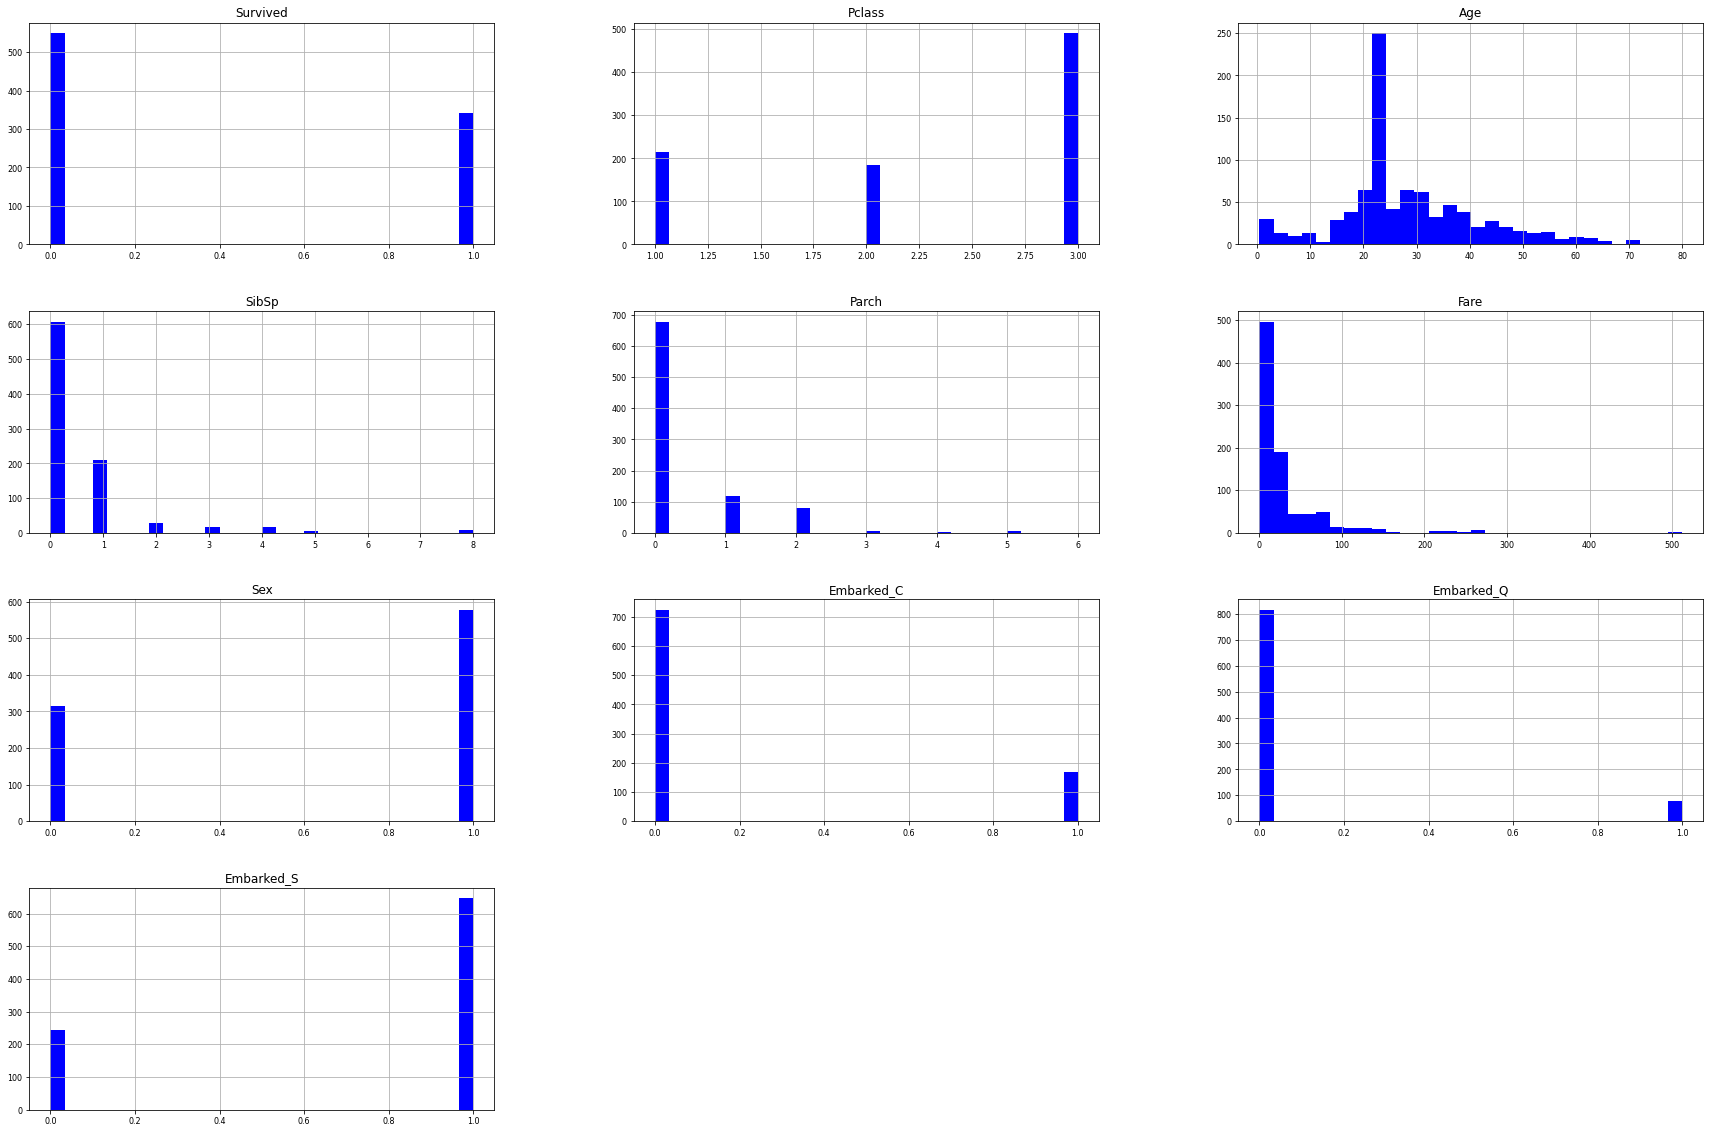

In [75]:
df_train.hist(figsize=(30, 20), color = 'b', bins=30, xlabelsize=8, ylabelsize=8)

In [76]:
#матриця
def corr_matrix(df):
    corrMatt = df.corr()
    mask = np.array(corrMatt)
    mask[np.tril_indices_from(mask)] = False
    fig,ax= plt.subplots()
    fig.set_size_inches(10,10)
    sns.heatmap(corrMatt, cmap="Reds", mask=mask,vmax=.8, square=True,annot=True)
    return corrMatt

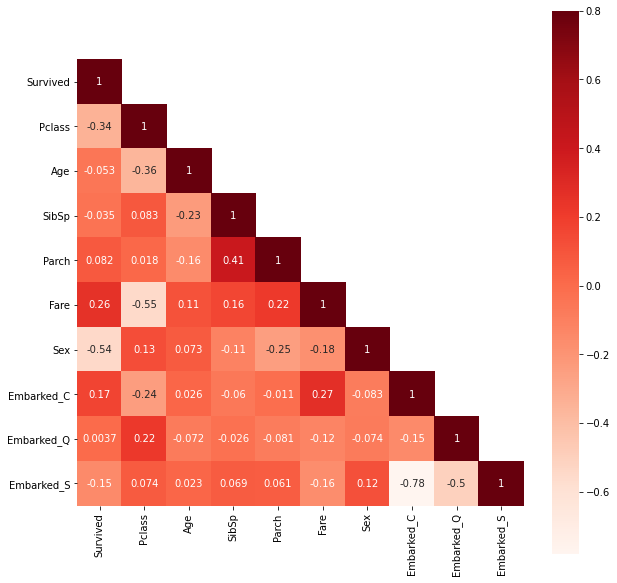

In [77]:
 corrMatt = corr_matrix(df_train)

In [78]:
df_train_survived = df_train.copy()
df_train.drop(['Survived'], axis='columns', inplace=True)

In [79]:
df_train_survived.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


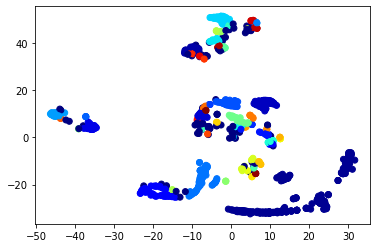

In [80]:
#Застосовуємо метод DBSCAN
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train)
test_scaled = scaler.fit_transform(df_test)

dbscan = DBSCAN(eps = 1, min_samples = 2)
tsne = TSNE()

train_plot = dbscan.fit(train_scaled)



train_result = dbscan.labels_


train_plot_tsne = tsne.fit_transform(train_scaled)
test_plot_tsne = tsne.fit_transform(test_scaled)

plt.scatter(train_plot_tsne[:, 0], train_plot_tsne[:, 1], c=train_result, cmap="jet")

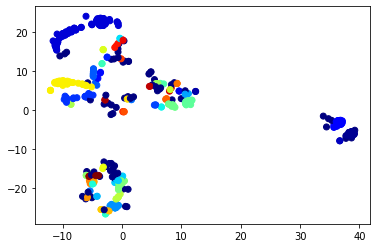

In [81]:
test_plot = dbscan.fit(test_scaled)
test_result = dbscan.labels_
plt.scatter(test_plot_tsne[:, 0], test_plot_tsne[:, 1], c=test_result, cmap="jet")

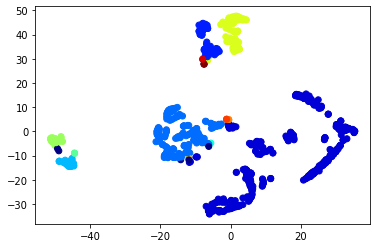

In [82]:
#Застосовуємо метод DBSCAN
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train)
test_scaled = scaler.fit_transform(df_test)

dbscan = DBSCAN(eps = 2, min_samples = 2)
tsne = TSNE()

train_plot = dbscan.fit(train_scaled)

train_result = dbscan.labels_

train_plot_tsne = tsne.fit_transform(train_scaled)
test_plot_tsne = tsne.fit_transform(test_scaled)

plt.scatter(train_plot_tsne[:, 0], train_plot_tsne[:, 1], c=train_result, cmap="jet")

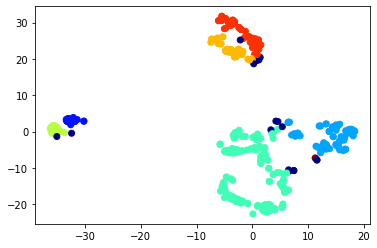

In [83]:
test_plot = dbscan.fit(test_scaled)
test_result = dbscan.labels_
plt.scatter(test_plot_tsne[:, 0], test_plot_tsne[:, 1], c=test_result, cmap="jet")

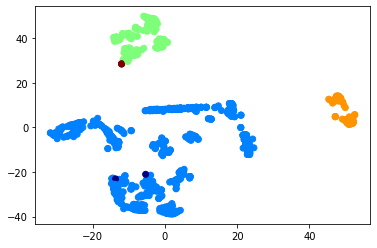

In [84]:
#Застосовуємо метод DBSCAN
scaler = StandardScaler()
train_scaled = scaler.fit_transform(df_train)
test_scaled = scaler.fit_transform(df_test)

dbscan = DBSCAN(eps = 3, min_samples = 2)
tsne = TSNE()

train_plot = dbscan.fit(train_scaled)

train_result = dbscan.labels_

train_plot_tsne = tsne.fit_transform(train_scaled)
test_plot_tsne = tsne.fit_transform(test_scaled)

plt.scatter(train_plot_tsne[:, 0], train_plot_tsne[:, 1], c=train_result, cmap="jet")

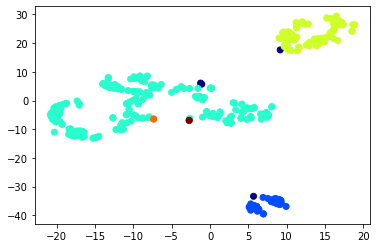

In [85]:
test_plot = dbscan.fit(test_scaled)
test_result = dbscan.labels_
plt.scatter(test_plot_tsne[:, 0], test_plot_tsne[:, 1], c=test_result, cmap="jet")

In [90]:
df_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,28.566970,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.725028
std,0.836071,13.199572,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000
50%,3.000000,24.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex         891 non-null    uint8  
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 38.4 KB
